In [3]:
from platform import python_version
import logging
from platform import python_version
import main.hist.gshm as gshm
import main.hist.cgshm as cgshm
import seaborn as sns

sns.set_theme(font_scale=1.5, rc={'text.usetex' : True})
from src.main.util.logging_utils import init_logger

logger = init_logger(logging.INFO)
if python_version() <= "3.10":
    logger.warning("This script has only been tested on python 3.9. Detected: {}".format(python_version()))

import numpy as np
import matplotlib.pyplot as plt

## Plot 1: Privacy Curves as in the previous paper.

We use the exact parameters they have and investigate the influence of the different parts of the delta.

## Reference Work: Exact analsis

$\begin{align*}
    \max \bigg[ &1 - \Phi \left( \frac{\tau}{\sigma} \right)^k, \\
    &\max_{j \in [k]} 1 - \Phi \left( \frac{\tau}{\sigma} \right)^{k - j} + \Phi \left( \frac{\tau}{\sigma} \right)^{k - j} \left[ \Phi\left(\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon - \gamma)\sigma}{\sqrt{j}}\right) - e^{\varepsilon - \gamma} \Phi\left(-\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon - \gamma)\sigma}{\sqrt{j}}\right) \right], \\
    &\max_{j \in [k]} \Phi\left(\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon + \gamma)\sigma}{\sqrt{j}}\right) - e^{\varepsilon + \gamma} \Phi\left(-\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon + \gamma)\sigma}{\sqrt{j}}\right)
    \bigg]
    \leq \delta ,
\end{align*}$

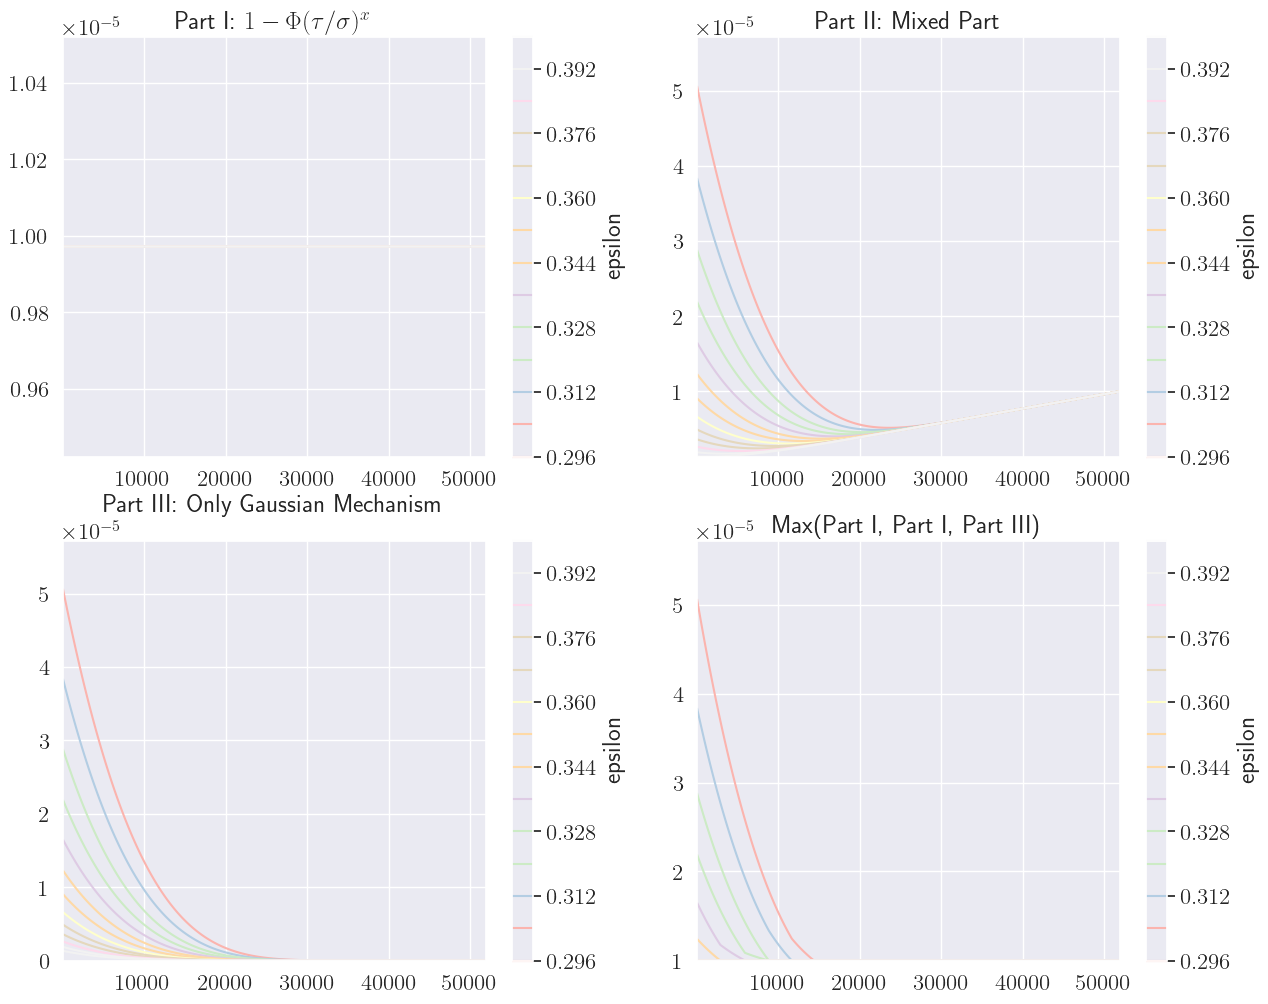

In [28]:
X, Y = np.meshgrid(range(1, c_u + 1), epsilon_range)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,12))

#ax2 = fig.add_subplot()
#CS = ax2.contour(X,all_results_part1,Y, levels=15, cmap="Pastel1")

#ax2 = fig.add_subplot()
CS1 = ax1.contour(X,part1,Y, levels=15, cmap="Pastel1")
ax1.set_title('Part I: $1-\\Phi(\\tau/\\sigma)^x$')
#ax1.set(ylim=(0,3))
plt.colorbar(CS1, label="epsilon")

CS2 = ax2.contour(X,part2,Y, levels=15, cmap="Pastel1")
ax2.set_title('Part II: Mixed Part')
#ax2.set(ylim=(0,3))
plt.colorbar(CS2, label="epsilon")

CS3 = ax3.contour(X,part3,Y, levels=15, cmap="Pastel1")
ax3.set_title('Part III: Only Gaussian Mechanism')
#ax3.set(ylim=(0,3))
plt.colorbar(CS3, label="epsilon")


#ax4.set_ylim(0,3)
CS4 = ax4.contour(X,maximum,Y, levels=15, cmap="Pastel1")
plt.colorbar(CS4, label="epsilon")
ax4.set_title('Max(Part I, Part I, Part III)')
ax4.set_visible(True)

#plt.xlabel('$a_=$')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
#plt.title('Deep Dive Th 5.4')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
plt.show()



[np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(na

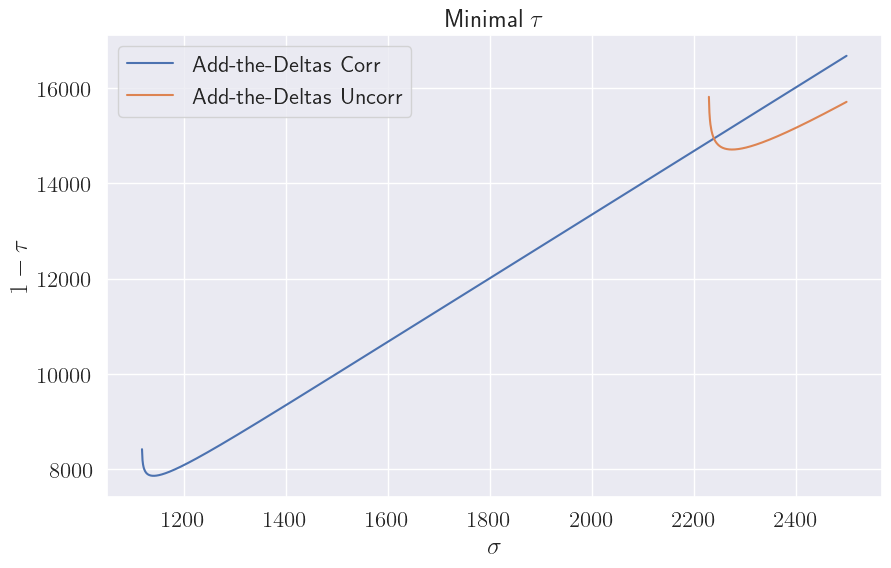

In [21]:
epsilon = 0.349
delta = 10**-5
sigmas = range(100, 2500)
k = 51914 # C_u in the paper

tau_add_deltas_correlated = [cgshm.threshold_add_the_delta(delta, epsilon, k, sig) for sig in sigmas] # TODO, mult x with sqrt(1 + 1/sqrt(k)), diff variance.
tau_add_deltas_standard =   [gshm.threshold_add_the_delta(delta, epsilon, k, sig) for sig in sigmas]

# tau_exact_standard = [gsm.gshm_exact() for sigma in sigmas]
# tau_exact_standard = [gshm.gshm_exact() for sigma in sigmas]

plt.figure(figsize=(10, 6))
plt.plot(sigmas, tau_add_deltas_correlated, label='Add-the-Deltas Corr')
plt.plot(sigmas, tau_add_deltas_standard, label='Add-the-Deltas Uncorr')

print(tau_add_deltas_correlated)
print(tau_add_deltas_standard)

plt.xlabel('$\\sigma$')
# plt.yscale("symlog", linthresh=1e-15) 
plt.xscale("linear")

plt.ylabel('$1-\\tau$')
plt.title('Minimal $\\tau$')
plt.legend()
plt.grid(True)

In [4]:
import importlib
importlib.reload(cgshm)
importlib.reload(gshm)
from math import *

logging.getLogger('src.main.hist.gshm').setLevel(logging.DEBUG)
logging.getLogger('src.main.hist.cgshm').setLevel(logging.DEBUG)

n=30
epsilon = 0.349
delta = 10**-5
k = 51914 # C_u in the reference paper
k = 10# C_u in the paper
max_sigma = 40

tau_exact_uncorrelated = gshm.compute_threshold_curve_tighter(delta, epsilon, k, datapoints=n, max_sigma=max_sigma)
tau_tighter_correlated = cgshm.compute_threshold_curve_tighter(delta, epsilon, k,max_sigma=max_sigma, datapoints=n) # Should work now.

logger.info("... Computing the rest ...")
sigmas_correlated = np.linspace(0, max_sigma, 50000)
sigmas_uncorrelated = np.linspace(0, max_sigma, 50000)
tau_add_deltas_correlated = [cgshm.threshold_add_the_delta(delta, epsilon, k, sig) for sig in sigmas_correlated]
tau_add_deltas_uncorrelated = [gshm.threshold_add_the_delta(delta, epsilon, k, sig) for sig in sigmas_uncorrelated]

# TODO Find better way to incorporate
logger.info(f'Scaling factor because of correlated noise: {1+1/sqrt(k)}')
sigmas_correlated = sigmas_correlated * (1+1/sqrt(k))



 2024-12-08 09:03:42,100 - INFO - ... Computing the rest ...
/Users/jpt915/Documents/git/sparse-gaussian-histograms/src/main/hist/cgshm.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  mu = sqrt(k + sqrt(k))/(2*sigma) # Sensitivity + Scaling in gaussian part.
/Users/jpt915/Documents/git/sparse-gaussian-histograms/src/main/hist/gshm.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  mu = math.sqrt(k) / sigma
 2024-12-08 09:03:50,115 - INFO - Scaling factor because of correlated noise: 1.316227766016838


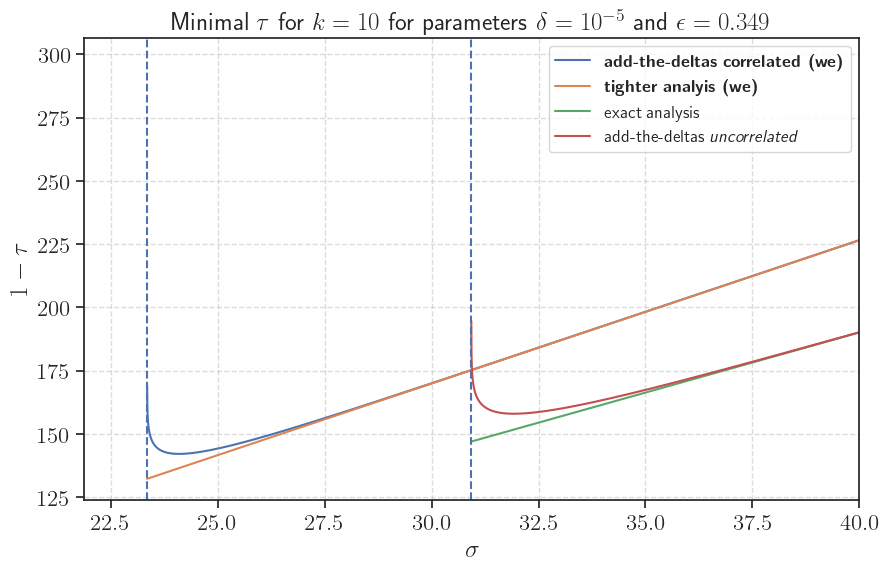

In [42]:

sns.set_style("ticks")
plt.figure(figsize=(10, 6))
plt.grid(True, linestyle='--', alpha=0.7)

# Plots
plt.plot(sigmas_correlated, tau_add_deltas_correlated, label='\\textbf{add-the-deltas \\emph{correlated} (we)}')
plt.plot(tau_tighter_correlated[0], tau_tighter_correlated[1], label='\\textbf{tighter analyis (we)}')
plt.plot(tau_exact_uncorrelated[0], tau_exact_uncorrelated[1], label='exact analysis')
plt.plot(sigmas_uncorrelated, tau_add_deltas_uncorrelated, label='add-the-deltas \\emph{uncorrelated}')

# Vertical lines
plt.axvline(x=tau_exact_uncorrelated[2], linestyle="--")
plt.axvline(x=tau_tighter_correlated[2], linestyle="--")

plt.xlim((None, max_sigma))

plt.xlabel('$\\sigma$')
# plt.yscale("symlog", linthresh=1e-15)
plt.xscale("linear")

plt.ylabel('$1-\\tau$'
           )
plt.title(f'Minimal $\\tau$ for $k={k}$ for parameters $\delta=10^{{-5}}$ and $\\epsilon={epsilon}$')

plt.legend(fontsize='x-small', title_fontsize='40')
plt.savefig("save/experiment1.pdf", format='pdf', bbox_inches='tight')
